<a href="https://colab.research.google.com/github/Karthik190803/Spoon-Knife/blob/main/Delhi_Air_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import warnings as w
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

w.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/delhi_files.csv')

In [3]:
data

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2024,0,5,58.43,249.17,41.69,65.89,0.99,36.25,263
1457,28,12,2024,0,6,33.83,150.77,33.31,66.14,0.79,35.19,113
1458,29,12,2024,1,7,31.21,139.75,27.01,65.94,0.57,35.88,142
1459,30,12,2024,0,1,38.01,152.83,29.12,65.16,0.55,38.38,116


In [5]:
data.sample(5)

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
1018,16,10,2023,0,1,47.14,171.28,273.28,20.99,0.50,9.90,403
69,11,3,2021,1,4,121.57,233.44,56.27,4.22,1.70,31.05,262
599,23,8,2022,0,2,34.37,56.00,15.04,26.67,0.41,47.15,69
777,17,2,2023,0,5,122.48,417.41,29.25,9.77,2.15,35.05,342
1361,23,9,2024,0,1,48.77,207.37,47.71,50.28,0.48,18.59,167


In [6]:
data['Day'] = data['Date']

In [7]:
data.drop(columns='Date',inplace=True)

In [8]:
data['proper date'] = pd.to_datetime(data[['Year','Month','Day']])

data = data.sort_values('proper date')

In [11]:
data['Date'] = data['Day']
data.drop(columns=['Day','Date','Year','Month'],inplace=True)

In [12]:
data.sample(5)

,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,proper date
210,0,5,29.74,40.97,56.05,7.30,0.80,29.30,53,2021-07-30
175,0,5,65.38,226.41,41.52,8.51,0.61,39.63,182,2021-06-25
860,0,4,107.38,316.22,56.76,34.72,1.97,54.94,221,2023-05-11
585,1,2,52.53,95.69,7.45,26.62,0.65,55.29,115,2022-08-09
185,0,1,66.23,223.87,33.63,7.18,0.49,38.63,151,2021-07-05


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Holidays_Count  1461 non-null   int64         
 1   Days            1461 non-null   int64         
 2   PM2.5           1461 non-null   float64       
 3   PM10            1461 non-null   float64       
 4   NO2             1461 non-null   float64       
 5   SO2             1461 non-null   float64       
 6   CO              1461 non-null   float64       
 7   Ozone           1461 non-null   float64       
 8   AQI             1461 non-null   int64         
 9   proper date     1461 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 114.3 KB


In [14]:
data.columns

Index(['Holidays_Count', 'Days', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone',
       'AQI', 'proper date'],
      dtype='object')

In [16]:
data.describe()

,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,proper date
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461
mean,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815,2023-01-01 00:00:00.000000256
min,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000,2021-01-01 00:00:00
25%,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000,2022-01-01 00:00:00
50%,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000,2023-01-01 00:00:00
75%,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000,2024-01-01 00:00:00
max,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000,2024-12-31 00:00:00
std,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076,NaN


In [17]:
data.nunique()

,0
Holidays_Count,2
Days,7
PM2.5,1391
PM10,1436
NO2,1308
SO2,1180
CO,240
Ozone,1264
AQI,403
proper date,1461


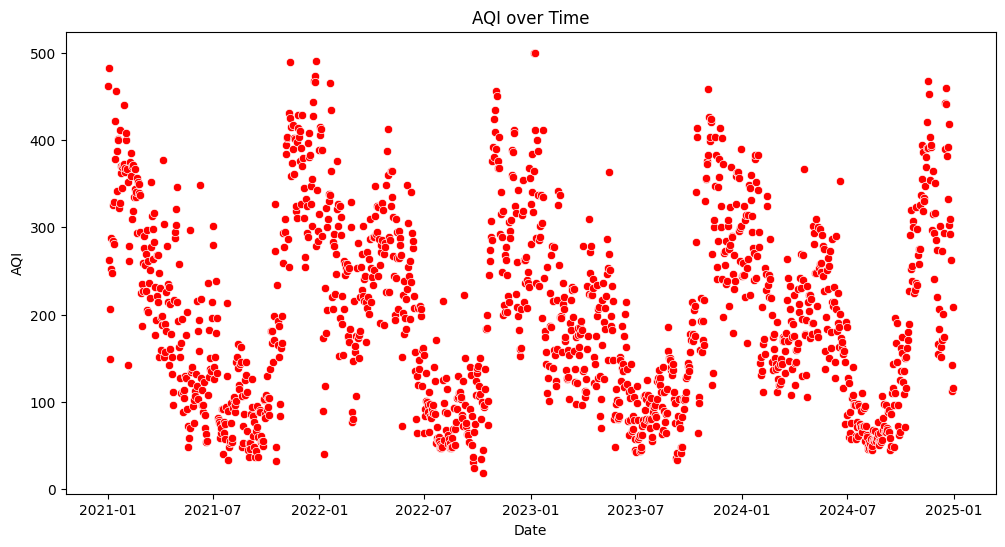

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='proper date', y='AQI',color='red')
plt.title('AQI over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()